In [2]:
import requests
import pandas as pd

Pull cryptocurrencies prices from public API and download them as Excel files

In [8]:
def get_historic_price(symbol, exchange="bitfinex", after="2018-09-01"):
    url = "https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(symbol=symbol, exchange=exchange)
    
    resp = requests.get(url, params={
        "periods": "3600",
        "after": str(int(pd.Timestamp(after).timestamp()))
    })
    
    resp.raise_for_status()
    
    data = resp.json()
    
    df = pd.DataFrame(data["result"]["3600"], columns = [
        "CloseTime", "OpenPrice", "HighPrice", "LowPrice", "ClosePrice", "Volume", "NA"
    ])
    
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    
    df.set_index("CloseTime", inplace=True)
    
    return df

Last 7 days of current time

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-08-25 17:12:47.578007')

In [10]:
# bitcoin
btc = get_historic_price("btc", "bitstamp", after=last_week)
btc

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-25 18:00:00,21447,21596,21438,21582,59.543690,1.281364e+06
2022-08-25 19:00:00,21585,21590,21504,21546,36.830036,7.938458e+05
2022-08-25 20:00:00,21546,21648,21518,21602,21.574939,4.660757e+05
2022-08-25 21:00:00,21602,21674,21561,21653,27.100116,5.858738e+05
2022-08-25 22:00:00,21653,21688,21556,21577,43.774992,9.456439e+05
...,...,...,...,...,...,...
2022-09-01 06:00:00,20050,20137,20028,20038,49.362471,9.915206e+05
2022-09-01 07:00:00,20035,20052,19950,19958,35.807355,7.164142e+05
2022-09-01 08:00:00,19965,19965,19810,19898,68.009282,1.352052e+06


In [11]:
# ether
eth = get_historic_price("eth", "bitstamp", after=last_week)
eth

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-25 18:00:00,1695.8,1713.4,1694.8,1705.2,207.267624,3.530306e+05
2022-08-25 19:00:00,1705.8,1708.3,1696.6,1700.9,145.650326,2.481661e+05
2022-08-25 20:00:00,1702.4,1712.8,1699.6,1706.4,320.388898,5.475428e+05
2022-08-25 21:00:00,1707.5,1712.7,1700.5,1709.2,342.979064,5.850918e+05
2022-08-25 22:00:00,1708.9,1711.6,1696.9,1702.1,396.515700,6.762121e+05
...,...,...,...,...,...,...
2022-09-01 06:00:00,1550.9,1562.3,1548.5,1554.3,170.057438,2.649969e+05
2022-09-01 07:00:00,1552.3,1556.2,1544.5,1549.3,102.630858,1.592269e+05
2022-09-01 08:00:00,1547.5,1547.8,1531.0,1543.0,1229.801149,1.893859e+06


## Bitcoin

In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-25 18:00:00,21447,21596,21438,21582,59.543690,1.281364e+06
2022-08-25 19:00:00,21585,21590,21504,21546,36.830036,7.938458e+05
2022-08-25 20:00:00,21546,21648,21518,21602,21.574939,4.660757e+05
2022-08-25 21:00:00,21602,21674,21561,21653,27.100116,5.858738e+05
2022-08-25 22:00:00,21653,21688,21556,21577,43.774992,9.456439e+05


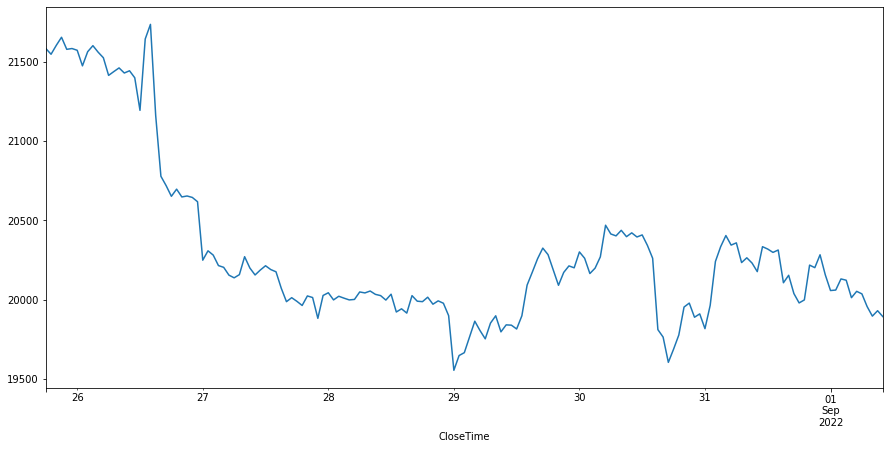

In [14]:
btc["ClosePrice"].plot(figsize=(15, 7));

## Ether

In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-08-25 18:00:00,1695.8,1713.4,1694.8,1705.2,207.267624,353030.621520
2022-08-25 19:00:00,1705.8,1708.3,1696.6,1700.9,145.650326,248166.100735
2022-08-25 20:00:00,1702.4,1712.8,1699.6,1706.4,320.388898,547542.781078
2022-08-25 21:00:00,1707.5,1712.7,1700.5,1709.2,342.979064,585091.774006
2022-08-25 22:00:00,1708.9,1711.6,1696.9,1702.1,396.515700,676212.114097


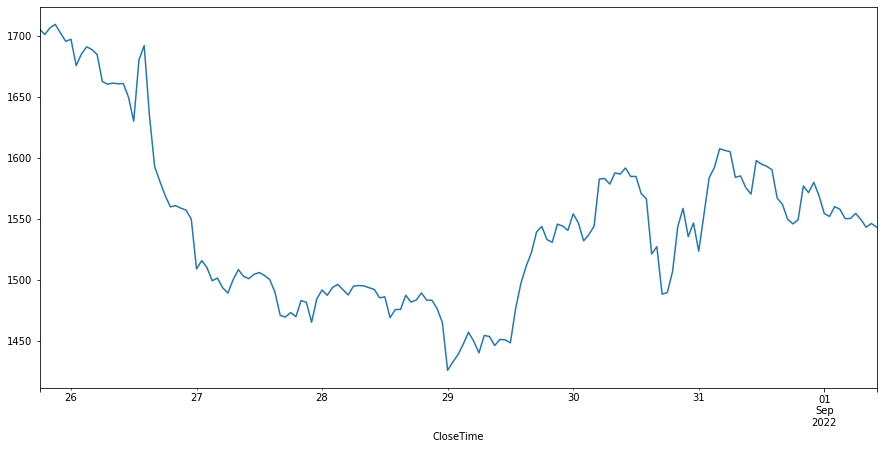

In [18]:
eth["ClosePrice"].plot(figsize=(15,7));

## Dynamic Plots Using Bokeh

In [21]:
!pip install bokeh

     ---------------------------------------- 18.5/18.5 MB 7.0 MB/s eta 0:00:00


In [23]:
from bokeh.plotting import figure, output_file, show 
from bokeh.io import output_notebook

In [24]:
output_notebook()

Loading BokehJS ...

In [27]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900", legend="Bitcoin")
p1.line(eth.index, eth["ClosePrice"], color="red", legend="Ether")

p1.legend.location = "top_left"

show(p1)

## Export to Excel

In [34]:
!pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 4.9 MB/s eta 0:00:00


In [35]:
import openpyxl
writer = pd.ExcelWriter("cryptos.xlsx")

btc.to_excel(writer, sheet_name = "Bitcoin")
eth.to_excel(writer, sheet_name = "Ether")

In [37]:
writer.save()

In [38]:
import os
os.listdir("./")

['.ipynb_checkpoints',
 '.jovianrc',
 'cryptocurrencies-prices.ipynb',
 'cryptos.xlsx']